In [2]:
# import necessary libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

In [3]:
# Loading the listing data
listings = pd.read_csv('../data/listings 2.csv')

#print the number of rows and columns
print(listings.shape)

print("Listings columns")
print(listings.columns.values)

(39821, 96)
Listings columns
['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
 'price' 'weekly_price' 'monthly_price' 'security_deposit' 'c

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Cleaning
First I gathered all the columns that having more than 35% missing values

In [4]:
columns_to_remove = [cols for cols in listings.columns.values if (listings[cols].isnull().sum()/len(listings))>=0.35]
columns_to_remove

['neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'license']




Before deleting them, it's better to see some sample of the data to check if it can be cleaned easily

In [5]:
# print column name along with sample of the data
for col in columns_to_remove:
    print (col)
    print(listings[col].head())

neighborhood_overview
0                                                  NaN
1    Quiet-yet-close to all the fun in LA! Hollywoo...
2                                                  NaN
3                                                  NaN
4    What makes the neighborhood unique is that the...
Name: neighborhood_overview, dtype: object
notes
0                                                  NaN
1    One dog may be on premises, friendly and cared...
2                                                  NaN
3                                                  NaN
4    If you are doing business travel, this studio ...
Name: notes, dtype: object
transit
0                                                  NaN
1    Short drive to subway and elevated trains runn...
2                                                  NaN
3                                                  NaN
4    Public transportation is a 3 minutes walk to t...
Name: transit, dtype: object
access
0                                



The data is mostly null or plain text that hard to transform to categories. Hence, I dropped those columns.

In [6]:
listings.drop(columns=columns_to_remove,inplace=True)


Next, I wanted to check the data type and transform all non-numeric data to numeric one.

In [7]:
listings.dtypes.value_counts()

object     53
float64    15
int64      13
dtype: int64

In [8]:
# getting all columns with 'object' data type
non_numerical_columns = [cols for cols in listings.columns.values if (listings[cols].dtype == 'object')]

# print column with sample data 
for col in non_numerical_columns:
    print(col)
    print(listings[col].head())

listing_url
0     https://www.airbnb.com/rooms/109
1     https://www.airbnb.com/rooms/344
2    https://www.airbnb.com/rooms/2404
3    https://www.airbnb.com/rooms/2732
4    https://www.airbnb.com/rooms/2864
Name: listing_url, dtype: object
last_scraped
0    2018-05-10
1    2018-05-10
2    2018-05-10
3    2018-05-11
4    2018-05-10
Name: last_scraped, dtype: object
name
0    Amazing bright elegant condo park front *UPGRA...
1                    Family perfect;Pool;Near Studios!
2                                              deleted
3                                Zen Life at the Beach
4    *Upscale Professional Home with Beautiful Studio*
Name: name, dtype: object
summary
0    *** Unit upgraded with new bamboo flooring, br...
1    This home is perfect for families; aspiring ch...
2                                                  NaN
3                                                  NaN
4    Centrally located.... Furnished with 42 inch S...
Name: summary, dtype: object
space
0    *** 

After looking at samples of 'object' columns, I decided to only focus on the ones that can be cleaned easily. To see if the data in each column is good, I checked the number of unique values and the distribution of the data.

In [9]:
non_numerical_more_analysis_columns = ['experiences_offered','host_since','host_response_rate','host_is_superhost',
                                        'host_has_profile_pic','host_identity_verified','property_type',
                                        'room_type','bed_type','amenities','price','security_deposit','cleaning_fee',
                                        'extra_people','requires_license','instant_bookable','cancellation_policy']
for col in non_numerical_more_analysis_columns:
    print(col)
    print(listings[col].describe())

experiences_offered
count     39821
unique        1
top        none
freq      39821
Name: experiences_offered, dtype: object
host_since
count          39762
unique          2968
top       2017-05-10
freq             156
Name: host_since, dtype: object
host_response_rate
count     31945
unique       70
top        100%
freq      24420
Name: host_response_rate, dtype: object
host_is_superhost
count     39762
unique        2
top           f
freq      29695
Name: host_is_superhost, dtype: object
host_has_profile_pic
count     39762
unique        2
top           t
freq      39656
Name: host_has_profile_pic, dtype: object
host_identity_verified
count     39762
unique        2
top           t
freq      21170
Name: host_identity_verified, dtype: object
property_type
count         39821
unique           40
top       Apartment
freq          15708
Name: property_type, dtype: object
room_type
count               39821
unique                  3
top       Entire home/apt
freq                23964
Nam

In [10]:
# the column 'experiences_offered' has only one value which doesn't make any sense to include it in the data
non_numerical_more_analysis_columns.remove('experiences_offered')

# the column 'host_since' has too many different values which might lead to overfetting. I decided to remove it
non_numerical_more_analysis_columns.remove('host_since')

# the column 'host_has_profile_pic' has two values where one is dominant so I decided to remove it
non_numerical_more_analysis_columns.remove('host_has_profile_pic')

# the column 'property_type' has 42 different values. It looks logically wrong as there might be typos 
# in some data points. I decided to remove this column
non_numerical_more_analysis_columns.remove('property_type')

# the column 'bed_type' has 5 values where one is dominant so I decided to remove it
non_numerical_more_analysis_columns.remove('bed_type')

# the column 'amenities' containes list of data that need to be decoded and cleaned.
# Since the number of ameneities might be high, I decided to remove this column
non_numerical_more_analysis_columns.remove('amenities')

# the column 'host_has_profile_pic' has two values where one is dominant so I decided to remove it
non_numerical_more_analysis_columns.remove('requires_license')

non_numerical_more_analysis_columns

['host_response_rate',
 'host_is_superhost',
 'host_identity_verified',
 'room_type',
 'price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'instant_bookable',
 'cancellation_policy']

The 'host_response_rate' is a percentage which needs to be replaced to a float number

In [11]:
listings['host_response_rate'] = listings['host_response_rate'].replace( '%','', regex=True ).astype(float)

In [12]:
listings['host_response_rate'].describe()

count    31945.000000
mean        95.003036
std         15.717577
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

The columns 'host_is_superhost', 'host_identity_verified', and 'instant_bookable' contains binary values (t,f). They needs to be encoded so that 't' will be 1 and 'f' will be 0 

In [13]:
true_false_columns = ['host_is_superhost' , 'host_identity_verified','instant_bookable']
listings[true_false_columns] = np.where(listings[true_false_columns]=='t', 1, 0)

The columns 'price', 'security_deposit' , 'cleaning_fee', and 'extra_people' are all contains doller sign followed by a number. The doller sign must be removed and then the number must be converted into a float number

In [14]:
doller_columns = ['price', 'security_deposit' , 'cleaning_fee', 'extra_people']
listings[doller_columns] = listings[doller_columns].replace('[\$,]', '', regex=True).astype(float)

The columns 'room_type' and 'cancellation_policy' contains many values which need to be encoded using pd.get_dummies method

In [15]:
columns_to_encode = ['room_type' , 'cancellation_policy' ] 
listings=pd.get_dummies(data=listings, columns=columns_to_encode,drop_first=True)

Keep the encoded columns and drop the rest

In [16]:
columns_to_delete = new_list = [col for col in non_numerical_columns if col not in non_numerical_more_analysis_columns]
listings.drop(columns=columns_to_delete,inplace=True, axis=1)

Next, Find out about the missing values and try to fill them

In [17]:
(listings.isnull().sum()/len(listings)).sort_values(ascending=False)

security_deposit                                   0.305316
review_scores_value                                0.234751
review_scores_location                             0.234550
review_scores_checkin                              0.234248
review_scores_communication                        0.233093
review_scores_accuracy                             0.233043
review_scores_cleanliness                          0.232867
review_scores_rating                               0.231812
reviews_per_month                                  0.217046
host_response_rate                                 0.197785
cleaning_fee                                       0.174179
host_total_listings_count                          0.001482
host_listings_count                                0.001482
beds                                               0.001105
bathrooms                                          0.001105
bedrooms                                           0.000552
accommodates                            

In [18]:
listings['security_deposit'].describe()

count    27663.000000
mean       386.918158
std        730.940200
min          0.000000
25%        100.000000
50%        200.000000
75%        400.000000
max       5100.000000
Name: security_deposit, dtype: float64

I assuemed that some listings will not have a security deposit. Hence, I filled the missing values with zero

In [19]:
listings['security_deposit'] = listings['security_deposit'].fillna(0)

Next, There are 8 columns that related to review scores. Missing value in one might lead to inaccurate ovreall review score. So I decided to drop those columns

In [20]:
review_columns = ['review_scores_value' , 'review_scores_location', 'review_scores_checkin', 
                  'review_scores_communication', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_rating', 'reviews_per_month']
listings.drop(columns=review_columns,inplace=True, axis=1)

In [21]:
listings['host_response_rate'].describe()

count    31945.000000
mean        95.003036
std         15.717577
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

It looks like that must of the data are within a small range. Dropping the column is the way to go!

In [22]:
listings.drop(columns='host_response_rate',inplace=True, axis=1)

In [23]:
listings['cleaning_fee'].describe()

count    32885.000000
mean        79.957184
std         86.145460
min          0.000000
25%         30.000000
50%         60.000000
75%        100.000000
max       1500.000000
Name: cleaning_fee, dtype: float64

I assuemed that some listings will not have a cleaning fee. Hence, I filled the missing values with zero

In [24]:
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(0)

In [25]:
listings['beds'].describe()

count    39777.000000
mean         1.988712
std          1.700394
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: beds, dtype: float64

Since the data looks normally distributed, I filled the missing values with the mean

In [26]:
listings['beds'] = listings['beds'].fillna(listings['beds'].mean())

In [27]:
listings['bathrooms'].describe()

count    39777.000000
mean         1.429105
std          0.929977
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         22.000000
Name: bathrooms, dtype: float64

Since the data looks normally distributed, I filled the missing values with the mean

In [28]:
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mean())

In [29]:
listings['bedrooms'].describe()

count    39799.000000
mean         1.396065
std          1.124425
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: bedrooms, dtype: float64

Since the data looks normally distributed, I filled the missing values with the mean

In [30]:
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mean())

In [31]:
listings['host_listings_count'].describe()

count    39762.000000
mean         7.332604
std         33.406735
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1124.000000
Name: host_listings_count, dtype: float64

It looks like there are outliers that made the mean to be high. Since most of the data is between 0 and 6, I will fill the missing with the value 3.5

In [32]:
listings['host_listings_count'] = listings['host_listings_count'].fillna(3.5)

In [33]:
listings['host_total_listings_count'].describe()

count    39762.000000
mean         7.332604
std         33.406735
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1124.000000
Name: host_total_listings_count, dtype: float64

It looks like there are outliers that made the mean to be high. Since most of the data is between 0 and 6, I will fill the missing with the value 3.5

In [34]:
listings['host_total_listings_count'] = listings['host_total_listings_count'].fillna(3.5)

In [35]:
(listings.isnull().sum()/len(listings)).sort_values(ascending=False)

cancellation_policy_super_strict_60                0.0
longitude                                          0.0
security_deposit                                   0.0
price                                              0.0
beds                                               0.0
bedrooms                                           0.0
bathrooms                                          0.0
accommodates                                       0.0
latitude                                           0.0
cancellation_policy_super_strict_30                0.0
host_identity_verified                             0.0
host_total_listings_count                          0.0
host_listings_count                                0.0
host_is_superhost                                  0.0
host_id                                            0.0
scrape_id                                          0.0
cleaning_fee                                       0.0
guests_included                                    0.0
extra_peop

I will drop the id, scrape_id, and host_id as they aren't relevent

In [36]:
listings.drop(columns=['id','scrape_id','host_id'],inplace=True, axis=1)

Next, looking at the price data to see if there is outliers

In [37]:
listings['price'].describe()

count    39821.000000
mean       197.202682
std        477.834477
min          0.000000
25%         69.000000
50%        100.000000
75%        179.000000
max      25000.000000
Name: price, dtype: float64

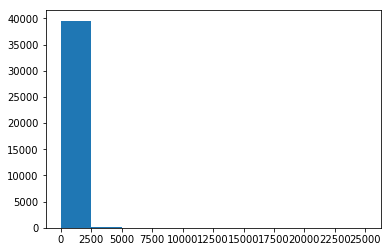

In [38]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(listings['price'])
ax.set_xticks(bins)
plt.show()

As we can see from the graph above, must of the data in the range between 0 and 2500. I will remove any row with price value larger than 2500 and repeate the same process

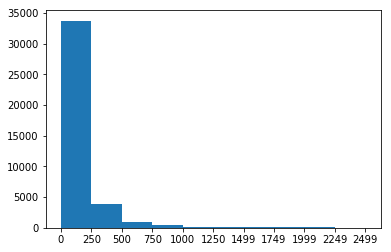

In [39]:
listings = listings[listings['price']<2500]
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(listings['price'])
ax.set_xticks(bins)
plt.show()

As we can see from the graph above, must of the data in the range between 0 and 500. I will remove any row with price value larger than 500 and repeate the same process

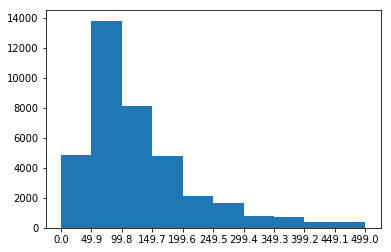

In [40]:
listings = listings[listings['price']<500]
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(listings['price'])
ax.set_xticks(bins)
plt.show()

Finally we have a clean data

In [41]:
# Print the list of columns
listings.columns

Index(['host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'instant_bookable', 'calculated_host_listings_count',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60'],
      dtype='object')

# Question 1: Can we predict the price?
Since I'm interested in predicting the price, I set 'price' as the target and the rest as features

In [42]:
target = listings['price']
features = listings.drop(columns=['price'],axis=1)

Split the data into train and test sets with 20% as test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.20, 
                                                    random_state=50)

Normalize the data

In [44]:
#fit and transform training data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

#transform test data
X_test=scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Next, I tried different models to predict the price and calculated the error. The model with the best error will be used later with optimaized parameters

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)
lr_test_predict = model.predict(X_test)
lr_train_predict = model.predict(X_train)
print("r2 score for train: ",r2_score(y_train,lr_train_predict))
print("r2 score for test: ",r2_score(y_test,lr_test_predict))

r2 score for train:  0.6033716371062414
r2 score for test:  0.6238178275476408


In [46]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
dtr_test_predict = model.predict(X_test)
dtr_train_predict = model.predict(X_train)
print("r2 score for train: ",r2_score(y_train,dtr_train_predict))
print("r2 score for test: ",r2_score(y_test,dtr_test_predict))

r2 score for train:  1.0
r2 score for test:  0.37926988168273224


In [47]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
rfr_test_predict = model.predict(X_test)
rfr_train_predict = model.predict(X_train)
print("r2 score for train: ",r2_score(y_train,rfr_train_predict))
print("r2 score for test: ",r2_score(y_test,rfr_test_predict))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


r2 score for train:  0.9404433426718477
r2 score for test:  0.6815442834124873


In [48]:
model = SVR()
model.fit(X_train,y_train)
svr_test_predict = model.predict(X_test)
svr_train_predict = model.predict(X_train)
print("r2 score for train: ",r2_score(y_train,svr_train_predict))
print("r2 score for test: ",r2_score(y_test,svr_test_predict))

r2 score for train:  0.5624176567539265
r2 score for test:  0.5692089940461595


In [49]:
model = Lasso()
model.fit(X_train,y_train)
l_test_predict = model.predict(X_test)
l_train_predict = model.predict(X_train)
print("r2 score for train: ",r2_score(y_train,l_train_predict))
print("r2 score for test: ",r2_score(y_test,l_test_predict))

r2 score for train:  0.5996925619279194
r2 score for test:  0.6207965555469562


In [50]:
model = ElasticNet()
model.fit(X_train,y_train)
et_test_predict = model.predict(X_test)
et_train_predict = model.predict(X_train)
print("r2 score for train: ",r2_score(y_train,et_train_predict))
print("r2 score for test: ",r2_score(y_test,et_test_predict))

r2 score for train:  0.5717507711598948
r2 score for test:  0.5925108181616383


In [51]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
gbr_test_predict = model.predict(X_test)
gbr_train_predict = model.predict(X_train)
print("r2 score for train: ",r2_score(y_train,gbr_train_predict))
print("r2 score for test: ",r2_score(y_test,gbr_test_predict))

r2 score for train:  0.6971882305030765
r2 score for test:  0.7016165941623784


In [52]:
model = AdaBoostRegressor()
model.fit(X_train,y_train)
abr_test_predict = model.predict(X_test)
abr_train_predict = model.predict(X_train)
print("r2 score for train: ",r2_score(y_train,abr_train_predict))
print("r2 score for test: ",r2_score(y_test,abr_test_predict))

r2 score for train:  0.32913506664184944
r2 score for test:  0.31238412699439067


I will focus on GradientBoostingRegressor and RandomForestRegressor

In [53]:
model = RandomForestRegressor(random_state = 50)
#parameters = {'max_depth': [20, 30, None],
#                 'min_samples_leaf': [2, 4],
#                 'n_estimators': [200, 400]
#             }

parameters = {'max_depth': [None],
              'min_samples_leaf':[2], 
              'n_estimators' : [400]
             }
rfr_grid_search = GridSearchCV(model, parameters, scoring = 'r2', return_train_score=True, verbose=3)
rfr_grid_search.fit(X_train, y_train)
print(rfr_grid_search.best_params_)

train_predict = rfr_grid_search.predict(X_train)
test_predict = rfr_grid_search.predict(X_test)

print("r2 score for train: ",r2_score(y_train,train_predict))
print("r2 score for test: ",r2_score(y_test,test_predict))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] max_depth=None, min_samples_leaf=2, n_estimators=400 ............


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, min_samples_leaf=2, n_estimators=400, score=0.6947315117457422, total= 1.1min
[CV] max_depth=None, min_samples_leaf=2, n_estimators=400 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, n_estimators=400, score=0.6928500375574909, total= 1.1min
[CV] max_depth=None, min_samples_leaf=2, n_estimators=400 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, n_estimators=400, score=0.7014227868124854, total= 1.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.3min finished


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 400}
r2 score for train:  0.9350600271606493
r2 score for test:  0.718366859490766


In [55]:
model = GradientBoostingRegressor(random_state = 50)
#parameters = {'n_estimators': [50,200,400,600],
#              'learning_rate':[0.1,0.3,0.5],
#              'max_depth' : [2, 5, 10],
#             }

parameters = {'n_estimators': [400],
              'learning_rate':[0.1],
              'max_depth' : [5],
             }
gbr_grid_search = GridSearchCV(model, parameters, scoring = 'r2', return_train_score=True, verbose=3)
gbr_grid_search.fit(X_train, y_train)
print(gbr_grid_search.best_params_)

train_predict = gbr_grid_search.predict(X_train)
test_predict = gbr_grid_search.predict(X_test)

print("r2 score for train: ",r2_score(y_train,train_predict))
print("r2 score for test: ",r2_score(y_test,test_predict))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] learning_rate=0.1, max_depth=5, n_estimators=400 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=400, score=0.7138084709143011, total=  24.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=400 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.9s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=5, n_estimators=400, score=0.7099543275103328, total=  23.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=400 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   48.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=5, n_estimators=400, score=0.7205697650276035, total=  23.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
r2 score for train:  0.827084911778694
r2 score for test:  0.7362770733735309


Looks like GradientBoostingRegressor is better at predicting the price

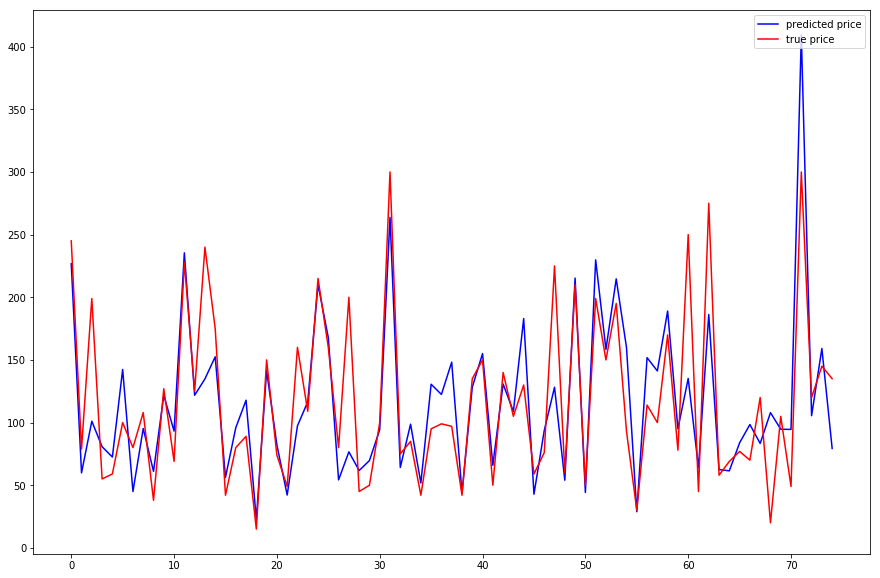

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(range(len(test_predict[:75])),test_predict[:75], color = 'blue')
ax.plot(range(len(y_test[:75])),y_test[:75], color = 'red')

#ax.plot(y_test, y_test, color = 'red')
ax.legend(('predicted price', 'true price'),loc='upper right')
plt.show()

# Question 2: What are the most important factors in determaing the price?

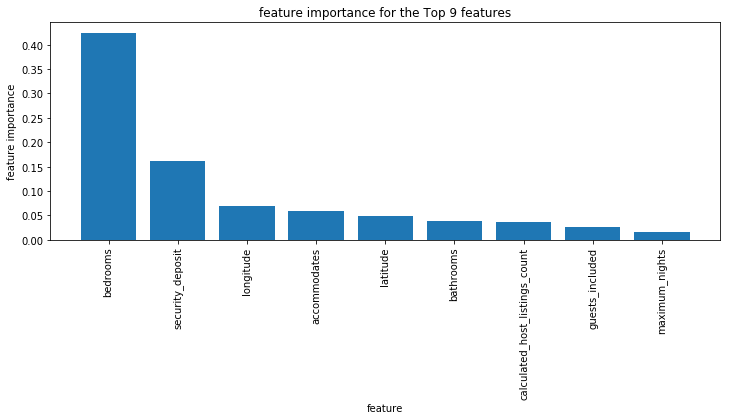

In [59]:
feature_importances_ = gbr_grid_search.best_estimator_.feature_importances_
features = sorted(zip(feature_importances_, listings.columns), reverse=True)
attribute = []
coefficient = []
for feature in features:
    attribute.append(feature[1]) 
    coefficient.append(feature[0])
plt.figure(figsize=(12,4))
plt.bar(attribute[:9], height=coefficient[:9])
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('feature importance')
plt.title('feature importance for the Top 9 features')
plt.show()

I looks like that the number of bedrooms is a crucial facrot in determining the price, and that seems logically correct. Another important and interesting factor is the security deposit. Location, which we can get from the longitude and latitude, are two less important factores than the two mentioned earlier. 

# Question 3: When is the most booked?

Here, I will be working with the 'calender.cvs' file

In [60]:
calendar = pd.read_csv('../data/calendar 2.csv')
print(calendar.shape)
print("Calender columns")
print(calendar.columns.values)
calendar.head()

(14534665, 4)
Calender columns
['listing_id' 'date' 'available' 'price']


,listing_id,date,available,price
0,3295878,2019-02-23,t,$95.00
1,3295878,2019-02-22,t,$95.00
2,3295878,2019-02-21,t,$95.00
3,3295878,2019-02-20,t,$95.00
4,3295878,2019-02-19,t,$95.00


In [61]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         7810820
dtype: int64

Since the data have a column for the availability, I assuemed that if the listing is not available then it has been rented. As the number of unavailable listings getting high, the bussier it is.

In [62]:
copy_of_calendar = calendar.copy()
copy_of_calendar = copy_of_calendar[copy_of_calendar['available'] == 'f']

In [63]:
copy_of_calendar

,listing_id,date,available,price
365,18511883,2019-05-09,f,NaN
366,18511883,2019-05-08,f,NaN
367,18511883,2019-05-07,f,NaN
368,18511883,2019-05-06,f,NaN
369,18511883,2019-05-05,f,NaN
370,18511883,2019-05-04,f,NaN
371,18511883,2019-05-03,f,NaN
372,18511883,2019-05-02,f,NaN
373,18511883,2019-05-01,f,NaN
374,18511883,2019-04-30,f,NaN


Dropping the price column as it's not relevant for the analysis and also because there are alot of missing values

In [64]:
copy_of_calendar.drop(['price'], axis=1)

,listing_id,date,available
365,18511883,2019-05-09,f
366,18511883,2019-05-08,f
367,18511883,2019-05-07,f
368,18511883,2019-05-06,f
369,18511883,2019-05-05,f
370,18511883,2019-05-04,f
371,18511883,2019-05-03,f
372,18511883,2019-05-02,f
373,18511883,2019-05-01,f
374,18511883,2019-04-30,f


I will collect the number of unavailable listings on daily basis.

In [65]:
days = copy_of_calendar.groupby('date')['available'].count()
days

date
2018-05-09     2271
2018-05-10    29750
2018-05-11    30911
2018-05-12    29309
2018-05-13    25950
2018-05-14    24468
2018-05-15    23970
2018-05-16    24008
2018-05-17    24379
2018-05-18    25725
2018-05-19    25939
2018-05-20    23638
2018-05-21    22434
2018-05-22    22065
2018-05-23    22135
2018-05-24    22739
2018-05-25    24262
2018-05-26    24902
2018-05-27    23693
2018-05-28    21382
2018-05-29    20441
2018-05-30    20372
2018-05-31    20724
2018-06-01    21342
2018-06-02    21411
2018-06-03    20350
2018-06-04    19745
2018-06-05    19495
2018-06-06    19581
2018-06-07    20225
              ...  
2019-04-11    23586
2019-04-12    23585
2019-04-13    23592
2019-04-14    23592
2019-04-15    23587
2019-04-16    23581
2019-04-17    23580
2019-04-18    23577
2019-04-19    23571
2019-04-20    23568
2019-04-21    23568
2019-04-22    23567
2019-04-23    23568
2019-04-24    23562
2019-04-25    23560
2019-04-26    23563
2019-04-27    23556
2019-04-28    23552
2019-04-29    2

Sorrting that list will give us the bussiest days 

In [66]:
days.sort_values(ascending=False).head(30)

date
2018-05-11    30911
2018-05-10    29750
2018-05-12    29309
2018-05-13    25950
2018-05-19    25939
2018-05-18    25725
2018-05-26    24902
2018-05-14    24468
2018-05-17    24379
2018-05-25    24262
2018-05-16    24008
2018-05-15    23970
2019-02-06    23709
2019-02-17    23708
2019-02-05    23707
2019-02-07    23704
2019-02-08    23703
2019-02-16    23700
2019-02-09    23698
2019-02-12    23698
2019-02-10    23695
2019-02-15    23694
2019-02-18    23694
2019-02-11    23693
2019-02-04    23693
2018-05-27    23693
2019-02-19    23693
2019-02-14    23691
2019-02-20    23690
2019-02-13    23689
Name: available, dtype: int64

It looks like that the second and third weeks of May were the busiest days in Los Angeles

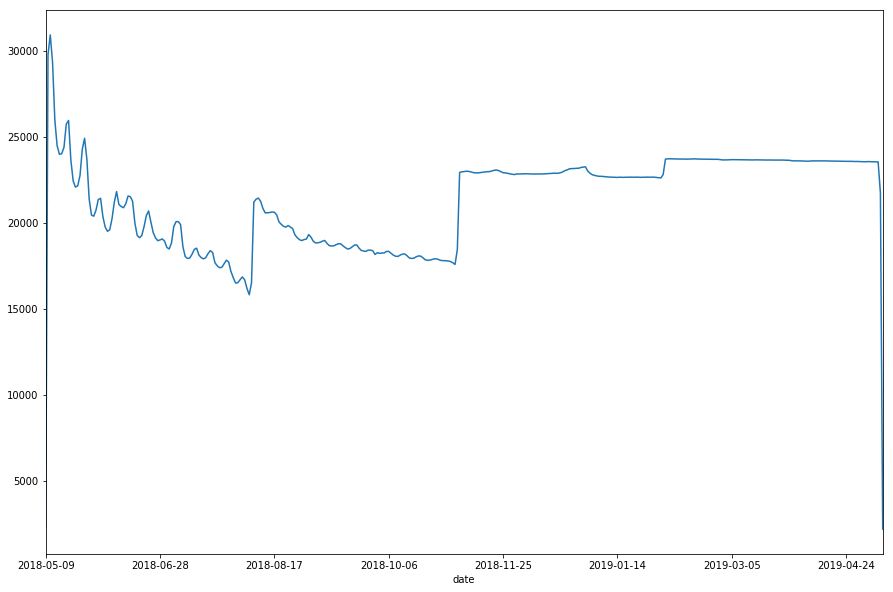

In [67]:
days.plot(figsize=(15,10))